# Neuronale Netzwerke

## Grundlagen

Ein neuronales Netzwerk kann in vielerlei Hinsichten mit einem Gehirn verglichen werden. Ähnlich wie das Gehirn besteht ein neuronales Netzwerk aus vielen Neuronen. Es gibt verschiedene Arten von Neuronen, die wiederum unterschiedliche Aktivierungsfunktion besitzen. Auf Aktivierungsfunktionen wird in einem späteren Teil der Arbeit genauer eingegangen.
Grundsätzlich besitzt jedes Neuron Eingabezahlen (x1, x2, …) die mit Gewichten (w1, w2, …) verbunden sind. Noch dazu besitzt jedes Neuron ein Bias (b). All diese Faktoren haben Einfluss auf den Ausgabewert eines Neurons. Um diesen zu berechnen, wird die gewichtete Summe der Eingabewerte mit dem Bias addiert. Mathematisch kann diese Berechnung folgendermaßen dargestellt werden: $\sum_{j} {w_j x_j + b}$ (vgl. Nielsen, 2015, #Perceptrons)

Mit einem einzelnen Neuron kann nicht viel angefangen werden, deswegen verbindet man die Neuronen miteinander, wodurch ein neuronales Netzwerk entsteht. Es gibt viele verschiedene Arten von neuronalen Netzwerken, das einfachste davon ist das sogenannte „Feedforward Neural Network“.

Bei dieser Variante werden Informationen kontinuierlich, d.h. ausschließlich von einer Schicht zur nächsthöheren, weitergeleitet. Es kann in drei Teile unterteilt werden: die Eingabeschicht, die verborgenen Schichten und die Ausgabeschicht. (ebd.)


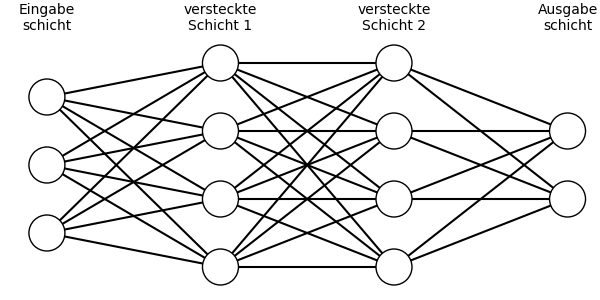

In [1]:
# Zeichne Netzwerk mit Code

from io import BytesIO
import matplotlib.pyplot as plt
from src.erstelle_netzwerk import zeichne_netzwerk
from src.hilfsfunktionen import erstelle_bild

grosse = 6
y_ratio = 0.5
zeichne_netzwerk(grosse, y_ratio, [3, 4, 4, 2])

bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

erstelle_bild(bild, 606, "Neuronales Netzwerk")


### Die Eingabeschicht

Die Eingabeschicht empfängt die Daten von externen Quellen. Bei einem Zahlenerkennungsmodell beispielsweise würde die Eingabeschicht die Pixeldaten des Bildes repräsentieren. Dementsprechend würde ein 28x28-Bild 784 Eingabeneuronen benötigen. (vgl. Lheureux, o.J.)

### Die verborgenen Schichten

Die verborgenen Schichten sind das, was neuronale Netzwerke so besonders macht. Sie verbinden die Eingabeschicht und die Ausgabeschicht miteinander. Je nach Schwierigkeitsgrad der Anwendung werden mehr und längere verborgene Schichten benötigt. Je mehr verborgene Neuronen es gibt, desto kompliziertere Berechnungen kann das neuronale Netzwerk durchführen. (ebd.)

### Die Ausgabeschicht

Die Ausgabeschicht gibt die endgültige Ausgabe des neuronalen Netzwerkes zurück. In dem Zahlenerkennungsmodell wären das die Ziffern 0 bis 9. (ebd.)

## Vorwärtspropagierung

### Skalarprodukt

In Vorwärtspropagierung werden die Eingabedaten des neuronalen Netzwerkes zur nächsten Schicht weitergegeben, bis sie zur Ausgabeschicht kommen und ein Ergebnis liefern. (vgl. Anshumanm2fja, 2024)

Um das neuronale Netzwerk in der Programmierung umzusetzen, verwende ich die Programmiersprache Python zusammen mit dem Paket „NumPy”. Ein neuronales Netzwerk mit zwei Eingabeneuronen und einem Ausgabeneuron kann wie folgt dargestellt werden:

In [2]:
import numpy as np

eingaben = [0.3, 0.6]
gewichte = [0.8, 0.2]
bias = 4

ausgabe = eingaben[0] * gewichte[0] + eingaben[1] * gewichte[1] + bias
print(ausgabe)

4.36


Im Folgenden wird auch noch die Ausgabe eines neuronalen Netzwerkes mit zwei Eingabeneuronen und zwei Ausgabeneuronen programmatisch umgesetzt.'

In [3]:
eingaben = [1.2, 3.2]
gewichte1 = [0.8, 1.3] # Gewichte zwischen dem ersten Eingabe- und Ausgabeneuron
gewichte2 = [3.1, 1.6] # Gewichte zwischen dem zweiten Eingabe- und Ausgabeneuron

bias1 = 4
bias2 = 3

ausgabe1 = eingaben[0] * gewichte1[0] + eingaben[1] * gewichte1[1] + bias1
ausgabe2 = eingaben[0] * gewichte2[0] + eingaben[1] * gewichte2[1] + bias2
print(ausgabe1, ausgabe2)

9.120000000000001 11.84


Jedoch ist diese Schreibweise sehr mühsam und ineffizient, weswegen zur Berechnung der Ausgabe Vektoren und Matrizen zusammen mit dem Skalarprodukt verwendet werden.

In [4]:
eingaben = [1.2, 3.2]
gewichte = [
    [0.8, 1.3],
    [3.1, 1.6],
]
bias = [4, 3]

ausgabe = np.dot(gewichte, eingaben) + bias
print(ausgabe)

[ 9.12 11.84]


### Batches

Bis jetzt rechnet der Code jeweils nur eine Schicht pro Zyklus (Batch) aus. Um die Effizienz zu steigern, werden pro Zyklus mehrere Batches gemacht; das bietet den Vorteil der Parallelisierung von Operationen. Das Lernen von neuronalen Netzwerken wird in der Praxis mit GPUs (Graphics Processing Units) durchgeführt. GPUs besitzen eine hohe Anzahl an Prozessoren, wodurch auch aufwendige Berechnungen schnell durchgeführt werden können. Eine weitere essenzielle Eigenschaft von Batches ist die Normalisierung. Wenn mehrere Schichten gleichzeitig ausgeführt werden, kann die Schwankung der Ausgabewerte ausbalanciert werden; dadurch wird das Lernen stabiler und konsistenter.
(vgl. Kinsley, 2020, TC: 8:00)

Um Batches zu implementieren, wird die Eingabeliste in eine zweidimensionale Liste konvertiert:

In [5]:
eingaben = [
    [1.2, 3.2],
    [3.2, 1.2],
    [4.2, 0.2],
    [3.1, 2.2],
]

ausgabe = np.dot(gewichte, eingaben) + bias

ValueError: shapes (2,2) and (4,2) not aligned: 2 (dim 1) != 4 (dim 0)

Der Code liefert jetzt allerdings einen Fehler:


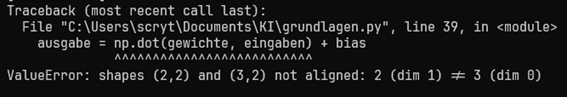

In [6]:
with open("VWA/Batch-Code-Fehler.png", "rb") as bild_datei:
    erstelle_bild(bild_datei, 606, "Batch-Code-Fehler")

Dieser Fehler tritt auf, da bei der Matrixmultiplikation die Reihenfolge der Parameter zu beachten ist. Wird die Anzahl der Eingabeneuronen auf drei erhöht, so tritt ein ähnlicher Fehler auf. Das hat mit der Durchführung der Matrixmultiplikationen zu tun. Bei dieser werden die Zeilen mit den Reihen multipliziert; da allerdings in diesem Fall die Reihen und die Spalten unterschiedliche Längen haben, können die Multiplikationen nicht durchgeführt werden. Um diesen Fehler zu beheben, muss die Matrix transponiert werden, d.h., Zeilen und Reihen werden vertauscht. (vgl. Kinsley, 2020, TC: 16:26)

In [7]:
transponierte_gewichte = np.array(gewichte).T
ausgabe = np.dot(eingaben, transponierte_gewichte) + bias
print(ausgabe)

[[ 9.12 11.84]
 [ 8.12 14.84]
 [ 7.62 16.34]
 [ 9.34 16.13]]


Um weitere Schichten hinzuzufügen, kann der bereits vorhandene Code wiederverwendet werden. Um dies effizient umzusetzen, bietet es sich an, Klassen zu schreiben. Die Klasse „Schicht” dient als Bauplan für alle Schichten, die instanziiert werden, in diesem Fall „schicht1” und „schicht2”.

In [8]:
class Schicht:
    def __init__(self, anzahl_eingaben, anzahl_neuronen):
        self.gewichte = 0.1 * np.random.randn(anzahl_eingaben, anzahl_neuronen)
        self.bias = 0.1 * np.random.randn(1, anzahl_neuronen)

    def vorwaerts(self, eingaben):
        self.gespeicherte_eingaben = eingaben
        ausgaben = np.dot(eingaben, self.gewichte) + self.bias
        return ausgaben


schicht1 = Schicht(2, 4)
schicht2 = Schicht(4, 5)

ausgaben1 = schicht1.vorwaerts(eingaben)
ausgaben2 = schicht2.vorwaerts(ausgaben1)
print(ausgaben2)

[[ 0.05934539 -0.08261903  0.02955806  0.01454048  0.04097125]
 [ 0.05534299 -0.06368777  0.18411808  0.05205212  0.03785359]
 [ 0.05334179 -0.05422215  0.26139809  0.07080794  0.03629476]
 [ 0.05628455 -0.06464826  0.14170657  0.03893903  0.0357334 ]]


Die Ausgaben der ersten Schicht werden als Eingaben für die zweite Schicht verwendet, um dann mit dieser die Ausgabeneuronen des Netzwerkes zu berechnen.

## Aktivierungsfunktionen

Ein neuronales Netzwerk ist im Wesentlichen eine Funktionsannäherung. Aktivierungsfunktionen ermöglichen es neuronalen Netzwerken, nicht-lineare Beziehungen zwischen Daten zu modellieren. Ein Neuron ohne Aktivierungsfunktion ist eine lineare Funktion. Besteht ein neuronales Netzwerk nur aus solchen Neuronen, dann kann dieses Netzwerk sich nur an lineare Funktionen annähern und besitzt somit nicht die Fähigkeit, komplexere Funktionen wie eine Sinusfunktion zu approximieren. (vgl. Kinsley, 2020, 7:47)


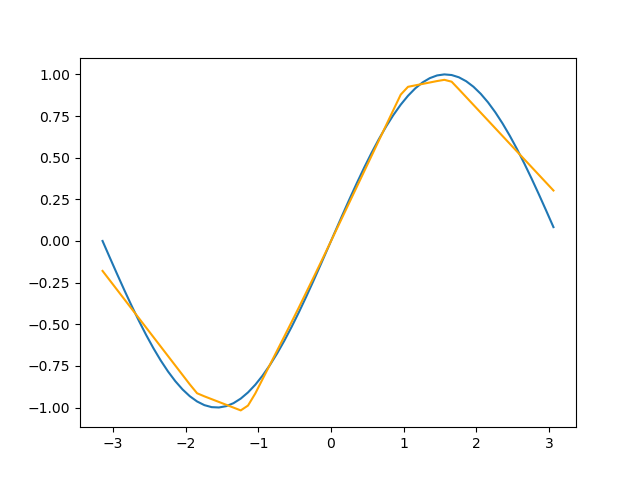

In [25]:
# Zeichne Sinus Funktionsannäherung mit Code

from matplotlib import animation
import matplotlib.pyplot as plt
from src import sin
import numpy as np
from io import BytesIO
from src.hilfsfunktionen import erstelle_bild
import math

sin_eingaben = np.arange(-math.pi, math.pi, 0.1)
sin_eingaben = sin_eingaben.reshape(len(sin_eingaben), 1)
ziele = np.sin(sin_eingaben)

netzwerk,_ = sin.trainiere_netzwerk(sin_eingaben, ziele)

vorhersagen = netzwerk.vorwaerts_durchlauf(sin_eingaben)
plt.plot(sin_eingaben, ziele, label="Wahre Funktion")
plt.plot(sin_eingaben, vorhersagen, label="Neuronales Netzwerk", color="orange")

bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

erstelle_bild(bild, 606, "Lineare Funktionsannäherung einer Sinuskurve")

Um dieses Problem zu lösen, werden auf das Ergebnis der Neuronen Aktivierungsfunktionen angewendet. Es gibt verschiedene Arten von Aktivierungsfunktionen, zwei weit verbreitete und beliebte sind die Sigmoid-Funktion und ReLU(rectified linear unit)-Funktion. (vgl. Kinsley, 2020, TC: 7:52)

### Die Sigmoid-Funktion

Die Sigmoid-Funktion ist eine mathematische Funktion, die den Wertebereich zwischen zwei Zahlen, beschränkt und eine S-förmige Kurve bildet. Es gibt verschiedene Varianten der Sigmoid-Funktion. Ein Beispiel dafür ist die Logistische Sigmoid-Funktion. Im Kontext des maschinellen Lernens wird die Logistische Sigmoid-Funktion auch oft als Sigmoid-Funktion bezeichnet. Mathematisch wird diese Funktion durch folgende Gleichung beschrieben:  $\sigma(x) = \frac{1}{1 +e^{-x}}$ (vgl. Topper, 2023)

Um die Aktivierungsfunktion an Schichten von Neuronen anzuwenden, erstelle ich die Klasse „Sigmoid”.

In [10]:
class Sigmoid:
    def vorwaerts(self, eingaben):
        self.gespeicherte_ausgaben = 1 / (1 + np.exp(-eingaben))
        return self.gespeicherte_ausgaben


schicht1 = Schicht(2, 4)
aktivierung1 = Sigmoid()

rohe_ausgaben = schicht1.vorwaerts(eingaben)
aktivierte_ausgaben = aktivierung1.vorwaerts(rohe_ausgaben)
print(aktivierte_ausgaben)

[[0.42704622 0.4473466  0.4590151  0.42475754]
 [0.30047577 0.51015994 0.536575   0.40029025]
 [0.2459012  0.5415705  0.57493058 0.38823266]
 [0.30652343 0.48678801 0.52394668 0.39989607]]


### Die ReLU-Funktion

Eine weitere Aktivierungsfunktion ist die ReLU-Funktion. Der Vorteil der ReLU-Funktion gegenüber anderen Aktivierungsfunktionen ist ihre Effizienz.
Ihre Funktionsweise ist einfach: Ist ein Wert positiv, wird der Wert beibehalten, ansonsten wird der Wert gleich 0 gesetzt. (vgl. Kinsley, 2020, TC: 9:00)

In [11]:
class ReLU:
    def vorwaerts(self, eingaben):
        self.gespeicherte_eingaben = eingaben
        ausgaben = np.maximum(0, eingaben)
        return ausgaben

### Die Softmax-Funktion

Die Softmax-Funktion ist eine weitere Aktivierungsfunktion, die aber in der Ausgabeschicht durchgeführt wird. Damit ein neuronales Netzwerk lernt, wird eine Methode benötigt, um festzustellen, wie falsch dessen Ausgabewerte sind. Hierzu werden die Ausgabeneuronen miteinander verglichen; mit Aktivierungsfunktionen wie ReLU allerdings kann dieser relative Vergleich nicht gemacht werden. (vgl. Kinsley, 2020, TC: 4:30)

Die Softmax-Funktion normalisiert die Ausgabedaten und wandelt sie zunächst in eine Wahrscheinlichkeitsdistribution um.  Anschließend werden sie mithilfe der exponentiellen Funktion $e^y$ exponiert, wodurch die Unterschiede zwischen den Ausgaben verstärkt und negative Werte ins Positive umgewandelt werden. (vgl. Saxena, 2021)

In [12]:
import math

ausgaben = [0.8, 1.3, 3.1, 1.6]
exponierte_werte = []

for ausgabe in ausgaben:
    exponierte_werte.append(math.e**ausgabe)

print(exponierte_werte)

[2.2255409284924674, 3.669296667619244, 22.197951281441632, 4.953032424395115]


Um die Ausgaben zu normalisieren, wird jede Ausgabe durch die Summe aller Ausgaben dividiert. (vgl. Kinsley, 2020, TC: 10:40) 

In [13]:
normalisierte_basis = sum(exponierte_werte)
normalisierte_werte = []

for ausgabe in exponierte_werte:
    normalisierte_werte.append(ausgabe / normalisierte_basis)

print(normalisierte_werte)

[0.06734712108248447, 0.11103663104910919, 0.6717324734831992, 0.14988377438520714]


So wie bei der der Sigmoid-Funktion und der ReLU-Funktion erstelle ich auch für die Softmax-Funktion eine Klasse.

In [14]:
class Softmax:
    def vorwaerts(self, eingaben):
        # Normalisiert die Ausgaben in Wahrscheinlichkeiten
        exponierte_werte = np.exp(eingaben - np.max(eingaben, axis=1, keepdims=True))
        summe = np.sum(exponierte_werte, axis=1, keepdims=True)
        ausgaben = exponierte_werte / summe
        return ausgaben

### Zahlungserkennungsmodell

Um ein Neuronales Netzwerk zu trainieren, werden Daten benötigt. Für ein Neuronales Netzwerk, das zu der Erkennung von Zahlen dient, eignet sich die MNIST-Datenbank. MNIST enthält 60.000 Trainingsbilder und 10.000 Testbilder von handgeschriebenen Ziffern und können somit zum Trainieren als auch für die Evaluierung verwendet werden. (vgl. Khan, 2024)

Für mein Neuronales Netzwerk verwende ich für die Eingabeschicht 784 Neuronen, da die MNIST Bilder aus 28 mall 28 Pixels bestehen. Ich habe eine verborgene Schicht mit 
20 Neuronen und der Aktivierungsfunktion ReLU. Die Ausgabeschicht besteht aus 10 Neuronen, die jeweils die Ziffern 0 bis 9 repräsentieren. Da es sich hier um ein Klassifizierungsproblem handelt, verwende ich für die Ausgabeschicht die Softmax-Funktion.


Zahl von 0 bis 59999:  5



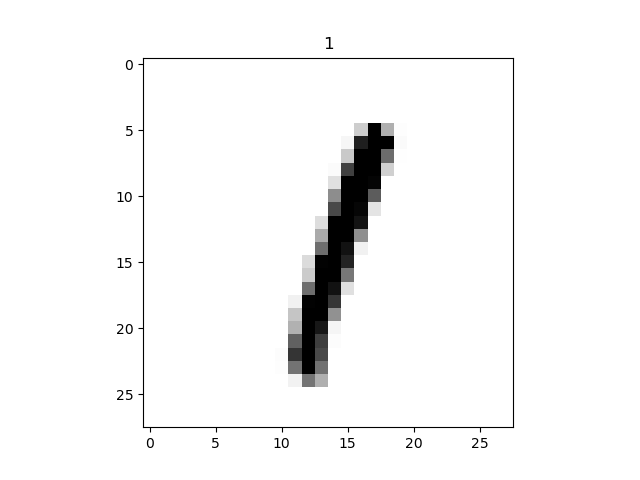

In [15]:
from daten.lade_daten import lade_test_daten
import matplotlib.pyplot as plt
from io import BytesIO

class Netzwerk:
    def __init__(
        self,
    ):
        self.schichten = []
        self.aktivierungen = []

    def schicht_hinzufügen(self, schicht, aktivierung):
        self.schichten.append(schicht)
        self.aktivierungen.append(aktivierung)

    def vorwaerts_durchlauf(self, eingaben):
        for schicht, aktivierung in zip(self.schichten, self.aktivierungen):
            rohe_ausgaben = schicht.vorwaerts(eingaben)
            aktivierte_ausgaben = aktivierung.vorwaerts(rohe_ausgaben)
            # Ausgaben der Schicht werden zu Eingaben für die nächste Schicht
            eingaben = aktivierte_ausgaben
        return aktivierte_ausgaben


netzwerk = Netzwerk()
netzwerk.schicht_hinzufügen(
    Schicht(784, 20),  # Eingabeschicht → versteckte Schicht
    ReLU(),  # Aktivierungsfunktion für die versteckte Schicht
)
netzwerk.schicht_hinzufügen(
    Schicht(20, 10),  # Versteckte Schicht → Ausgabeschicht
    Softmax(),  # Aktivierungsfunktion für die Ausgabeschicht
)
bilder, beschriftungen = lade_test_daten()
index = int(input("Zahl von 0 bis 59999: "))
bild = bilder[index]
plt.imshow(bild.reshape(28, 28), cmap="Greys")
vorhersagen = netzwerk.vorwaerts_durchlauf(bilder[index])
vorhersage = np.argmax(vorhersagen)

plt.title(vorhersage)
bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

erstelle_bild(bild, 606, "Falsche vorhergesagte Zahl")


# Trainieren eines Neuronalen Netzwerkes

# Loss Funktionen

In [16]:
vorhersagen = np.array([0.6, 0.3])
ziele = np.array([1, 0])

verluste = np.square(vorhersagen - ziele)
kost = np.mean(verluste)
print(kost)

0.125


In [17]:
class MittlererQuadratischerFehler:
    def verlust(vorhersagen, ziele):
        return np.mean(np.square(vorhersagen - ziele))

    def rueckwaerts(vorhersagen, ziele):
        return 2 * (vorhersagen - ziele) / len(vorhersagen)
    
    
class Kreuzentropie():
    def verlust(vorhersagen, ziele):
        vorhersagen = np.clip(vorhersagen, 1e-7, 1 - 1e-7)
        return -np.mean(np.sum(ziele * np.log(vorhersagen), axis=1))

    def rueckwaerts(vorhersagen, ziele):
        return (vorhersagen - ziele) / len(vorhersagen)

## Gradient Descent


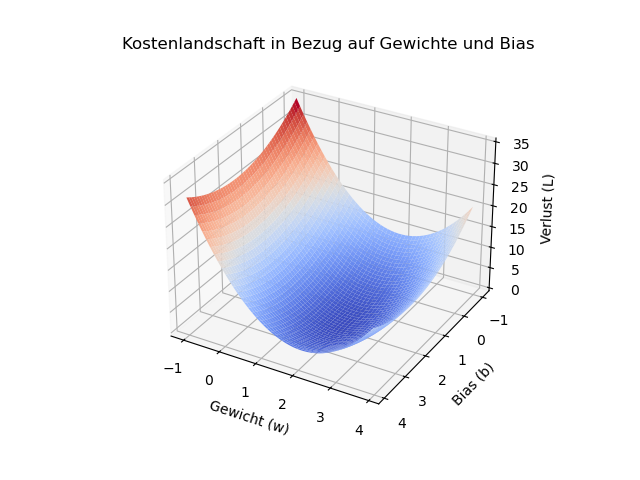

In [19]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 2 * x + 2


eingaben = np.arange(-3, 3, 0.1)
ziele = f(eingaben)


def berechne_kostenfunktion_auf_gewicht_bias(gewichte, bias):
    vorhersagen = gewichte * eingaben + bias
    verlust = MittlererQuadratischerFehler.verlust(vorhersagen, ziele)
    return verlust


def berechne_gradient(gewicht, bias):
    vorhersagen = gewicht * eingaben + bias
    verlust_gradient = MittlererQuadratischerFehler.rueckwaerts(vorhersagen, ziele)

    gradient_gewicht = np.dot(eingaben.T, verlust_gradient)
    gradient_bias = np.sum(verlust_gradient)
    return [gradient_gewicht, gradient_bias]


def zeichne_landschaft():
    gewichtsbereich = np.arange(-1, 4, 0.1)
    biasbereich = np.arange(-1, 4, 0.1)
    gewichte, bias = np.meshgrid(gewichtsbereich, biasbereich)
    verluste = np.array(
        [
            [
                berechne_kostenfunktion_auf_gewicht_bias(gewicht, bias_wert)
                for gewicht in gewichtsbereich
            ]
            for bias_wert in biasbereich
        ]
    )

    ax.plot_surface(
        gewichte,
        bias,
        verluste,
        cmap="coolwarm",
    )  # Kostenlandschaft


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", computed_zorder=False)

zeichne_landschaft()

# Achsentitel
ax.set_title("Kostenlandschaft in Bezug auf Gewichte und Bias")
ax.set_xlabel("Gewicht (w)")
ax.set_ylabel("Bias (b)")
ax.invert_yaxis()
ax.set_zlabel("Verlust (L)")

bild = BytesIO()
plt.savefig(bild, format="png")
bild.seek(0)
plt.close()

erstelle_bild(bild, 606, "Kostenlandschaft in Bezug auf Gewichte und Bias")


# Abbildungsverzeichnis

In [22]:
from IPython.display import display, HTML
from src.hilfsfunktionen import zitierungen 

for zitierung in zitierungen:
    html = f"""<a href=#{zitierung[1]} style=" color: var(--jp-content-font-color1);">{zitierung[0]}</a>"""
    display(HTML(html))